<a href="https://colab.research.google.com/github/Vertex138/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Colin_Brinkley_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [1]:
!pip install pandas==0.23.4

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [2]:
import pandas as pd

#Load and set the headers
cancerHeaders = ['Age', 'Year', 'Nodes', 'Survival']
cancerDF = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names = cancerHeaders)

#Check for missing values. They all return 0, so there's no missing values
cancerDF.isnull().sum()

#Replace the 2s with 0s
cancerDF['Survival'].replace(2,0,inplace=True)
cancerDF.head(5)

,Age,Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [3]:
#Crosstab: Age and Number of Nodes detected
cancerAgeBins = pd.cut(cancerDF['Age'],10)
cancerNodeBins = pd.cut(cancerDF['Nodes'],10)
pd.crosstab(cancerAgeBins,cancerNodeBins)

Nodes,"(-0.052, 5.2]","(5.2, 10.4]","(10.4, 15.6]","(15.6, 20.8]","(20.8, 26.0]","(26.0, 31.2]","(31.2, 36.4]","(41.6, 46.8]","(46.8, 52.0]"
Age,,,,,,,,,
"(29.947, 35.3]",10,4,1,0,0,1,0,0,0
"(35.3, 40.6]",23,1,2,0,1,0,0,0,0
"(40.6, 45.9]",34,5,2,3,1,0,0,0,1
"(45.9, 51.2]",40,6,5,1,1,0,0,0,0
"(51.2, 56.5]",40,6,3,2,3,0,0,1,0
"(56.5, 61.8]",34,3,1,1,1,0,1,0,0
"(61.8, 67.1]",31,3,3,1,2,1,0,0,0
"(67.1, 72.4]",15,2,1,0,0,0,0,0,0
"(72.4, 77.7]",7,0,0,0,0,0,0,0,0


In [4]:
#Crosstab: Year of surgery, Number of Nodes and Survival
pd.crosstab(cancerDF['Year'], [cancerDF['Survival'], cancerNodeBins])

Survival             0                 ...                 1             
Nodes    (-0.052, 5.2] (5.2, 10.4]     ...      (26.0, 31.2] (41.6, 46.8]
Year                                   ...                               
58                   8           1     ...                 1            0
59                   6           0     ...                 0            0
60                   1           1     ...                 0            0
61                   2           0     ...                 1            0
62                   4           0     ...                 0            0
63                   3           1     ...                 0            0
64                   5           3     ...                 0            0
65                   7           2     ...                 0            0
66                   4           1     ...                 0            0
67                   2           2     ...                 0            1
68                   1           1     ...                 0            0
69                   3           0     ...                 0            0

[12 rows x 14 columns]

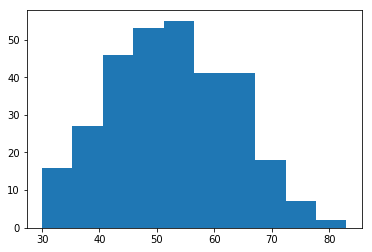

In [5]:
# Making a simple histogram to represent the density of ages
import matplotlib.pyplot as plt
plt.hist(list(cancerDF['Age']));

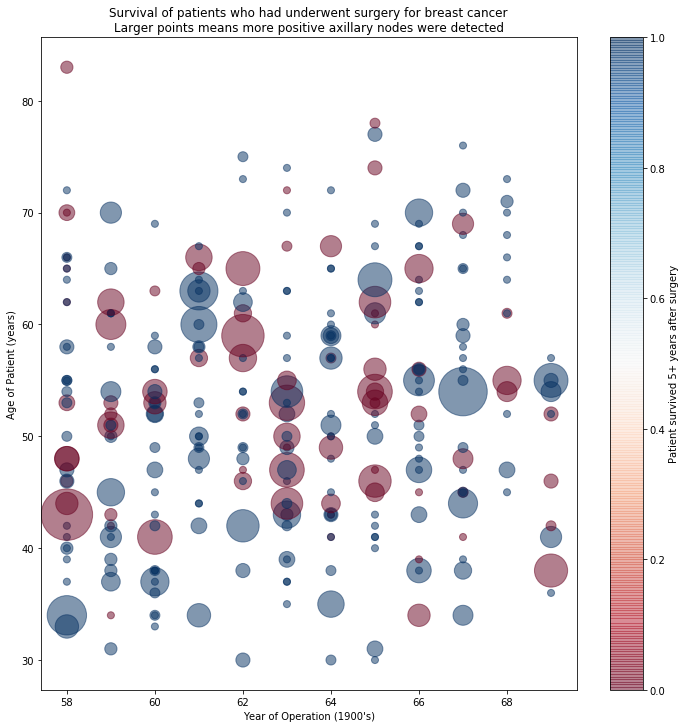

In [6]:
# Making a scattergraph to represent ALL the data (this should be interesting!)

#Define the graph and it's size
fig, cancerScatter = plt.subplots()
fig.set_size_inches(12,12)

#Set the color based on "survival"
c = cancerDF['Survival']

#Set the size based on "nodes
s = (cancerDF['Nodes'] * 50) + 50

#Create the labels and titles
cancerScatter.set_xlabel('Year of Operation (1900\'s)')
cancerScatter.set_ylabel('Age of Patient (years)')
cancerScatter.set_title('Survival of patients who had underwent surgery for breast cancer\nLarger points means more positive axillary nodes were detected')

#Draw the scatter graph
cancerScatter = plt.scatter(cancerDF['Year'], cancerDF['Age'], c=c, cmap='RdBu', s=s, alpha=0.5)

#Draws the guide for survival
cancerBar = plt.colorbar()
cancerBar.set_label('Patient survived 5+ years after surgery')

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [0]:
#Split them up
cancerSurvivorDF = cancerDF[cancerDF['Survival'] == 1]
cancerCasualtyDF = cancerDF[cancerDF['Survival'] == 0]

#Drop the redundant column to save RAM
cancerSurvivorDF = cancerSurvivorDF.drop(columns=['Survival'])
cancerCasualtyDF = cancerCasualtyDF.drop(columns=['Survival'])

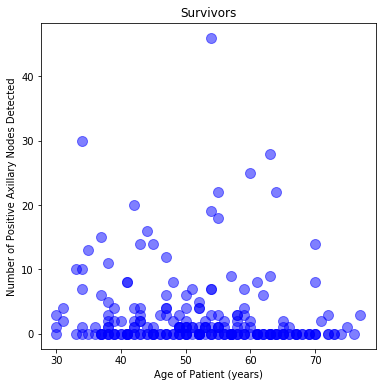

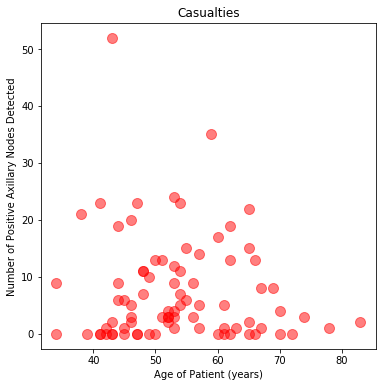

In [8]:
#Define the survivor graph and it's size
fig, survivorScatter = plt.subplots()
fig.set_size_inches(6,6)

#Create labels and title
survivorScatter.set_xlabel('Age of Patient (years)')
survivorScatter.set_ylabel('Number of Positive Axillary Nodes Detected')
survivorScatter.set_title('Survivors')

#Draw the scatter graph
survivorScatter = plt.scatter(cancerSurvivorDF['Age'], cancerSurvivorDF['Nodes'], s=100, c='blue', alpha=0.5)

#Define the casualty graph and it's size
fig, casualtyScatter = plt.subplots()
fig.set_size_inches(6,6)

#Create labels and title
casualtyScatter.set_xlabel('Age of Patient (years)')
casualtyScatter.set_ylabel('Number of Positive Axillary Nodes Detected')
casualtyScatter.set_title('Casualties')

#Draw the scatter graph
casualtyScatter = plt.scatter(cancerCasualtyDF['Age'], cancerCasualtyDF['Nodes'], s=100, c='red', alpha=0.5)

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**Postive:** If the surgery was performed at a later year, then the patient is *slightly* more likely to survive. This is likely because advances were made in the medical field to make the procedure more effective.

**Negative:** If more positive nodes are dectected, then patient is less likely to survive. This is because surgery only has a *chance* to work on each node. More nodes means more chances for the surgery to fail.

**Negative:** If the patient is older, then they are less likely to survive. This may be because patients who are older have weaker immune systems or abilities to heal. A more definite answer is that older individuals tend to have a higher chance of dying in accidents, of other illnesses, or any other number of factors.